<a href="https://colab.research.google.com/github/sreeja-g/NLP-DL/blob/main/txt_num_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### One Hot Representation

In [1]:
sent1 = "Time flies like an arrow."
sent2 = "Fruit flies like a banana."
sent3 = "Fruit flies like time flies a fruit."
full_corpus = [sent1, sent2,  sent3]

In [2]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_all_words(corp):
  all_sent = corp[0]
  all_sent = [all_sent+" "+each_sent for each_sent in corp[1:] if len(corp)>1 ][0]
  all_sent = re.sub(r'([^\s\w]|_)+', '', all_sent.lower())
  all_sent = all_sent.split(' ')
  all_words = list(set(all_sent))
  return all_words

In [4]:
all_words = get_all_words(full_corpus)

In [5]:
all_words_dict = { all_words[i]:i for i in range(len(all_words))}
all_words_dict

{'a': 4,
 'an': 2,
 'arrow': 6,
 'banana': 1,
 'flies': 3,
 'fruit': 0,
 'like': 7,
 'time': 5}

In [6]:
def one_hot_rep(sent):
  words_sent = re.sub(r'([^\s\w]|_)+', '', sent.lower()).split(' ') 
  full_vec = []
  for each in words_sent:
    vec = [0 for i in range(len(all_words))]
    vec[all_words_dict[each]] = 1
    full_vec.append(vec)
  return full_vec

In [7]:
one_hot_rep(sent1), one_hot_rep(sent2),  one_hot_rep(sent3)

([[0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0]],
 [[1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0]],
 [[1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
def one_hot_rep_collapsed(sent):
  words_sent = re.sub(r'([^\s\w]|_)+', '', sent.lower()).split(' ') 
  vec = []
  for each in all_words:
    if each in words_sent:
      vec.append(1)
    else:
      vec.append(0)
  return vec

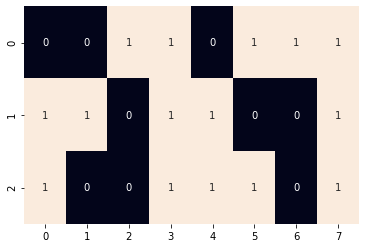

In [9]:
sns.heatmap([one_hot_rep_collapsed(sent1), one_hot_rep_collapsed(sent2),  one_hot_rep_collapsed(sent3)], annot=True, cbar=False)
plt.show()

### Term Frequency Representation

In [10]:
def TF_rep(sent):
  words_sent = re.sub(r'([^\s\w]|_)+', '', sent.lower()).split(' ') 
  vec = [0 for i in range(len(all_words))]
  for each in words_sent:
    vec[all_words_dict[each]] += 1
  return vec

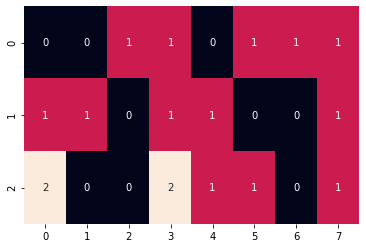

In [11]:
sns.heatmap([TF_rep(sent1), TF_rep(sent2), TF_rep(sent3)], annot=True, cbar=False)
plt.show()

### Term Frequency - Inverse Document Frequency Representation

In [12]:
import math

In [13]:
def idf_(word,corp):
  N_ = len(corp)
  docs_to_words = [re.sub(r'([^\s\w]|_)+', '', each_sent.lower()).split(' ') for each_sent in corp]
  n_ = 0
  for doc in docs_to_words:
    if word in doc:
      n_ += 1
  return math.log(N_/n_)

In [20]:
def tf_idf_rep(sent):
  vec = TF_rep(sent)
  words_sent = re.sub(r'([^\s\w]|_)+', '', sent.lower()).split(' ') 
  for word in all_words:
    if word in words_sent:
      vec[all_words_dict[word]] *= idf_(word,full_corpus)
  return vec

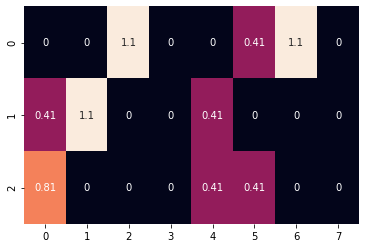

In [21]:
sns.heatmap([tf_idf_rep(sent1), tf_idf_rep(sent2), tf_idf_rep(sent3)], annot=True, cbar=False)
plt.show()

## SKlearn

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

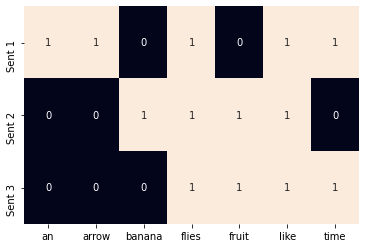

In [17]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(full_corpus)
sns.heatmap(one_hot.toarray(), annot=True, cbar=False, xticklabels=one_hot_vectorizer.get_feature_names(), yticklabels=['Sent '+str(i+1) for i in range(len(full_corpus))])
plt.show()

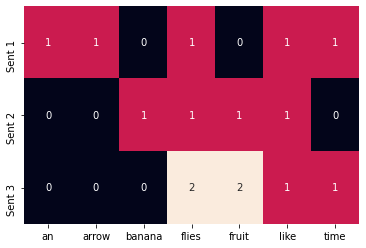

In [18]:
TF_vectorizer = CountVectorizer(binary=False)
TF = TF_vectorizer.fit_transform(full_corpus)
sns.heatmap(TF.toarray(), annot=True, cbar=False, xticklabels=TF_vectorizer.get_feature_names(), yticklabels=['Sent '+str(i+1) for i in range(len(full_corpus))])
plt.show()

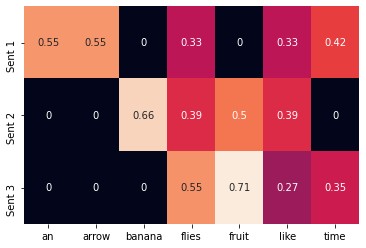

In [19]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(full_corpus)
sns.heatmap(tfidf.toarray(), annot=True, cbar=False, xticklabels=tfidf_vectorizer.get_feature_names(), yticklabels= ['Sent '+str(i+1) for i in range(len(full_corpus))])
plt.show()